In [ ]:
### Aadhaar Early-Childhood Enrolment Analysis (Age 0–5)

In [7]:
import os
import pandas as pd

ENROLMENT_PATH = "api_data_aadhar_enrolment"

In [9]:
files = [
    "api_data_aadhar_enrolment_0_500000.csv",
    "api_data_aadhar_enrolment_500000_1000000.csv",
    "api_data_aadhar_enrolment_1000000_1006029.csv"
]

dfs = []

for file in files:
    file_path = os.path.join(ENROLMENT_PATH, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

aadhaar_df = pd.concat(dfs, ignore_index=True)

In [11]:
aadhaar_df.shape

(1006029, 7)

In [13]:
aadhaar_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [15]:
aadhaar_df["total_enrolment"] = (
    aadhaar_df["age_0_5"] +
    aadhaar_df["age_5_17"] +
    aadhaar_df["age_18_greater"]
)

In [17]:
aadhaar_df[["age_0_5", "age_5_17", "age_18_greater", "total_enrolment"]].head()

,age_0_5,age_5_17,age_18_greater,total_enrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


In [19]:
aadhaar_df["date"] = pd.to_datetime(aadhaar_df["date"], dayfirst=True)

In [21]:
aadhaar_df["year"] = aadhaar_df["date"].dt.year
aadhaar_df["month"] = aadhaar_df["date"].dt.month

In [23]:
national_age_summary = aadhaar_df[[
    "age_0_5",
    "age_5_17",
    "age_18_greater",
    "total_enrolment"
]].sum()

national_age_summary

age_0_5            3546965
age_5_17           1720384
age_18_greater      168353
total_enrolment    5435702
dtype: int64

In [25]:
national_age_percentage = (
    national_age_summary / national_age_summary["total_enrolment"]
) * 100

national_age_percentage

age_0_5             65.253117
age_5_17            31.649711
age_18_greater       3.097171
total_enrolment    100.000000
dtype: float64

In [27]:
state_age_summary = (
    aadhaar_df
    .groupby("state")[["age_0_5", "age_5_17", "age_18_greater", "total_enrolment"]]
    .sum()
    .reset_index()
)

In [29]:
state_age_percentage = state_age_summary.copy()

state_age_percentage["pct_0_5"] = (
    state_age_percentage["age_0_5"] /
    state_age_percentage["total_enrolment"]
) * 100

state_age_percentage["pct_5_17"] = (
    state_age_percentage["age_5_17"] /
    state_age_percentage["total_enrolment"]
) * 100

state_age_percentage["pct_18_plus"] = (
    state_age_percentage["age_18_greater"] /
    state_age_percentage["total_enrolment"]
) * 100

In [31]:
state_age_percentage[
    ["state", "pct_0_5"]
].sort_values(by="pct_0_5").head(10)

,state,pct_0_5
0,100000,0.000000
30,Meghalaya,19.293803
32,Nagaland,28.947200
29,Manipur,38.198573
6,Bihar,43.123600
4,Arunachal Pradesh,45.050645
40,Sikkim,47.757136
53,Westbengal,50.000000
45,Uttar Pradesh,51.151597
20,Jammu And Kashmir,59.894737


In [33]:
# Keep only rows where state is alphabetic (real state names)
state_age_percentage_clean = state_age_percentage[
    state_age_percentage["state"].str.isalpha()
].copy()

In [35]:
state_age_percentage_clean[
    ["state", "pct_0_5"]
].sort_values(by="pct_0_5").head(10)

,state,pct_0_5
30,Meghalaya,19.293803
32,Nagaland,28.947200
29,Manipur,38.198573
6,Bihar,43.123600
40,Sikkim,47.757136
53,Westbengal,50.000000
5,Assam,61.353971
22,Jharkhand,62.556573
44,Tripura,65.361099
39,Rajasthan,65.941950


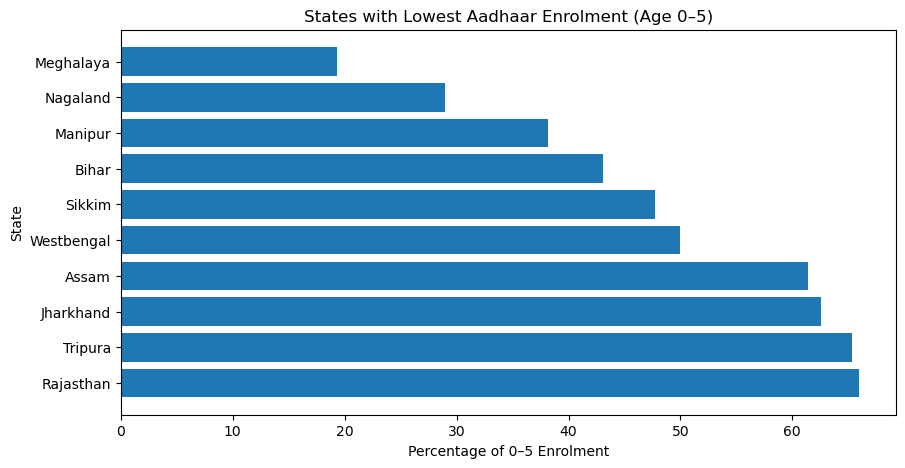

In [37]:
import matplotlib.pyplot as plt

low_0_5_states = (
    state_age_percentage_clean[["state", "pct_0_5"]]
    .sort_values(by="pct_0_5")
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(low_0_5_states["state"], low_0_5_states["pct_0_5"])
plt.xlabel("Percentage of 0–5 Enrolment")
plt.ylabel("State")
plt.title("States with Lowest Aadhaar Enrolment (Age 0–5)")
plt.gca().invert_yaxis()
plt.show()

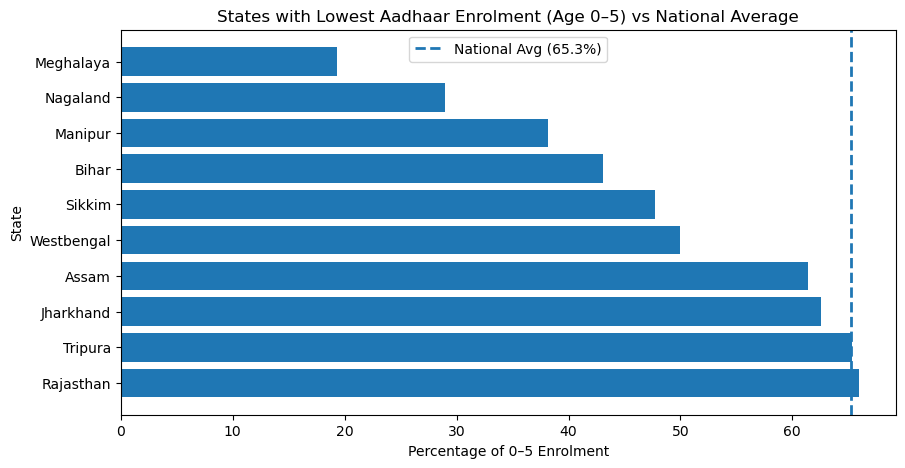

In [39]:
national_pct_0_5 = national_age_percentage["age_0_5"]

plt.figure(figsize=(10, 5))
plt.barh(low_0_5_states["state"], low_0_5_states["pct_0_5"])
plt.axvline(
    x=national_pct_0_5,
    linestyle="--",
    linewidth=2,
    label=f"National Avg ({national_pct_0_5:.1f}%)"
)
plt.xlabel("Percentage of 0–5 Enrolment")
plt.ylabel("State")
plt.title("States with Lowest Aadhaar Enrolment (Age 0–5) vs National Average")
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [41]:
meghalaya_df = aadhaar_df[aadhaar_df["state"] == "Meghalaya"].copy()

meghalaya_df.shape

(3771, 10)

In [43]:
meghalaya_district_summary = (
    meghalaya_df
    .groupby("district")[["age_0_5", "age_5_17", "age_18_greater", "total_enrolment"]]
    .sum()
    .reset_index()
)

meghalaya_district_summary.head()

,district,age_0_5,age_5_17,age_18_greater,total_enrolment
0,East Garo Hills,1012,3366,1674,6052
1,East Jaintia Hills,983,2354,1796,5133
2,East Khasi Hills,4258,14606,9948,28812
3,Eastern West Khasi Hills,3,226,589,818
4,Jaintia Hills,4,0,0,4


In [45]:
meghalaya_district_pct = meghalaya_district_summary.copy()

meghalaya_district_pct["pct_0_5"] = (
    meghalaya_district_pct["age_0_5"] /
    meghalaya_district_pct["total_enrolment"]
) * 100

In [47]:
meghalaya_district_pct[
    ["district", "pct_0_5"]
].sort_values(by="pct_0_5").head(10)

,district,pct_0_5
3,Eastern West Khasi Hills,0.366748
5,Kamrup,9.090909
8,South Garo Hills,12.789912
7,Ri Bhoi,14.374731
2,East Khasi Hills,14.778564
6,North Garo Hills,14.890844
13,West Khasi Hills,15.159140
0,East Garo Hills,16.721745
1,East Jaintia Hills,19.150594
12,West Jaintia Hills,20.159106


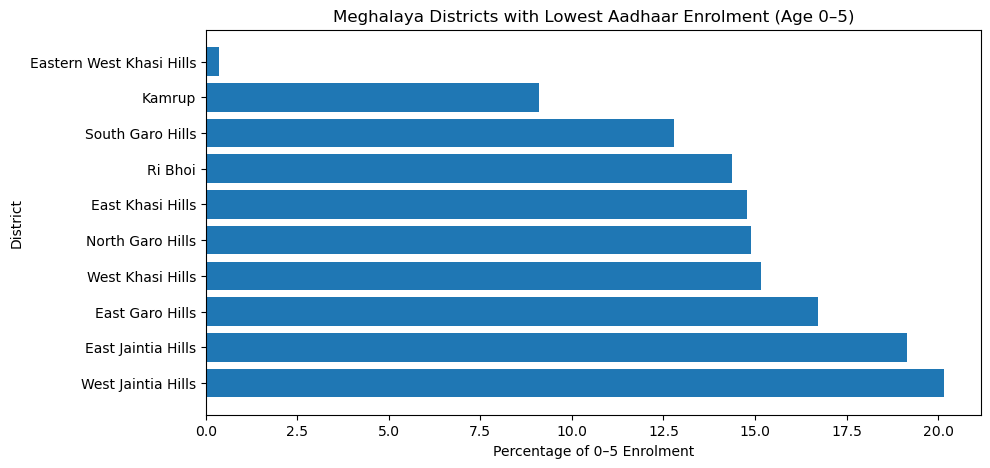

In [49]:
low_0_5_districts = (
    meghalaya_district_pct[["district", "pct_0_5"]]
    .sort_values(by="pct_0_5")
    .head(10)
)

plt.figure(figsize=(10, 5))
plt.barh(low_0_5_districts["district"], low_0_5_districts["pct_0_5"])
plt.xlabel("Percentage of 0–5 Enrolment")
plt.ylabel("District")
plt.title("Meghalaya Districts with Lowest Aadhaar Enrolment (Age 0–5)")
plt.gca().invert_yaxis()
plt.show()

In [51]:
state_pct = state_age_percentage_clean.copy()

In [53]:
top_5_states = (
    state_pct[["state", "pct_0_5"]]
    .sort_values(by="pct_0_5", ascending=False)
    .head(5)
)

top_5_states

,state,pct_0_5
33,ODISHA,100.000000
48,WESTBENGAL,100.000000
26,Lakshadweep,94.581281
36,Pondicherry,93.789308
7,Chandigarh,90.929122


In [55]:
bottom_5_states = (
    state_pct[["state", "pct_0_5"]]
    .sort_values(by="pct_0_5", ascending=True)
    .head(5)
)

bottom_5_states

,state,pct_0_5
30,Meghalaya,19.293803
32,Nagaland,28.947200
29,Manipur,38.198573
6,Bihar,43.123600
40,Sikkim,47.757136


In [57]:
best_vs_worst = pd.concat([
    top_5_states.assign(group="Top 5 States"),
    bottom_5_states.assign(group="Bottom 5 States")
])

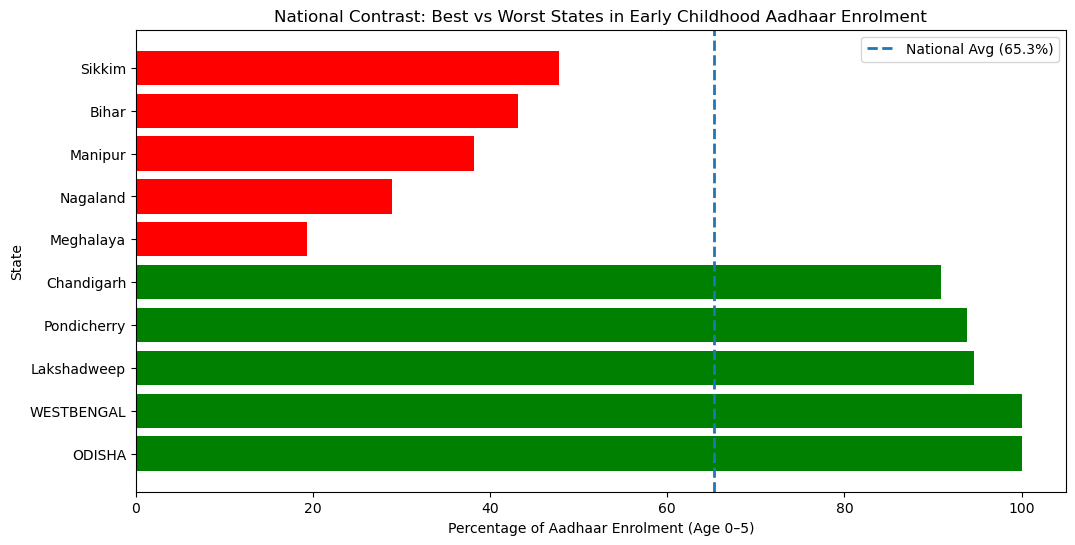

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

colors = best_vs_worst["group"].map({
    "Top 5 States": "green",
    "Bottom 5 States": "red"
})

plt.barh(
    best_vs_worst["state"],
    best_vs_worst["pct_0_5"],
    color=colors
)

plt.axvline(
    x=national_age_percentage["age_0_5"],
    linestyle="--",
    linewidth=2,
    label=f"National Avg ({national_age_percentage['age_0_5']:.1f}%)"
)

plt.xlabel("Percentage of Aadhaar Enrolment (Age 0–5)")
plt.ylabel("State")
plt.title("National Contrast: Best vs Worst States in Early Childhood Aadhaar Enrolment")
plt.legend()
plt.show()

In [61]:
region_map = {
    # North
    "Jammu And Kashmir": "North",
    "Himachal Pradesh": "North",
    "Punjab": "North",
    "Haryana": "North",
    "Delhi": "North",
    "Uttarakhand": "North",
    "Chandigarh": "North",

    # South
    "Tamil Nadu": "South",
    "Kerala": "South",
    "Karnataka": "South",
    "Andhra Pradesh": "South",
    "Telangana": "South",
    "Puducherry": "South",

    # East
    "West Bengal": "East",
    "Odisha": "East",
    "Bihar": "East",
    "Jharkhand": "East",

    # West
    "Maharashtra": "West",
    "Gujarat": "West",
    "Rajasthan": "West",
    "Goa": "West",
    "Daman And Diu": "West",
    "Dadra And Nagar Haveli": "West",

    # Central
    "Uttar Pradesh": "Central",
    "Madhya Pradesh": "Central",
    "Chhattisgarh": "Central",

    # North-East
    "Assam": "North-East",
    "Meghalaya": "North-East",
    "Nagaland": "North-East",
    "Manipur": "North-East",
    "Tripura": "North-East",
    "Mizoram": "North-East",
    "Arunachal Pradesh": "North-East",
    "Sikkim": "North-East",

    # Islands / UTs
    "Lakshadweep": "Islands",
    "Andaman And Nicobar Islands": "Islands"
}

In [63]:
state_pct["region"] = state_pct["state"].map(region_map)
state_pct.head()

,state,age_0_5,age_5_17,age_18_greater,total_enrolment,pct_0_5,pct_5_17,pct_18_plus,region
5,Assam,141235,66085,22877,230197,61.353971,28.708020,9.938010,North-East
6,Bihar,262875,334802,11908,609585,43.123600,54.922939,1.953460,East
7,Chandigarh,2476,211,36,2723,90.929122,7.748806,1.322071,North
8,Chhattisgarh,82453,18769,1997,103219,79.881611,18.183668,1.934721,Central
14,Delhi,69183,22296,3050,94529,73.187064,23.586413,3.226523,North


In [65]:
regional_summary = (
    state_pct
    .dropna(subset=["region"])
    .groupby("region")["pct_0_5"]
    .mean()
    .reset_index()
    .sort_values(by="pct_0_5")
)

regional_summary

,region,pct_0_5
4,North-East,47.243701
1,East,62.121266
6,West,73.100900
0,Central,79.881611
5,South,80.820250
3,North,83.613241
2,Islands,94.581281


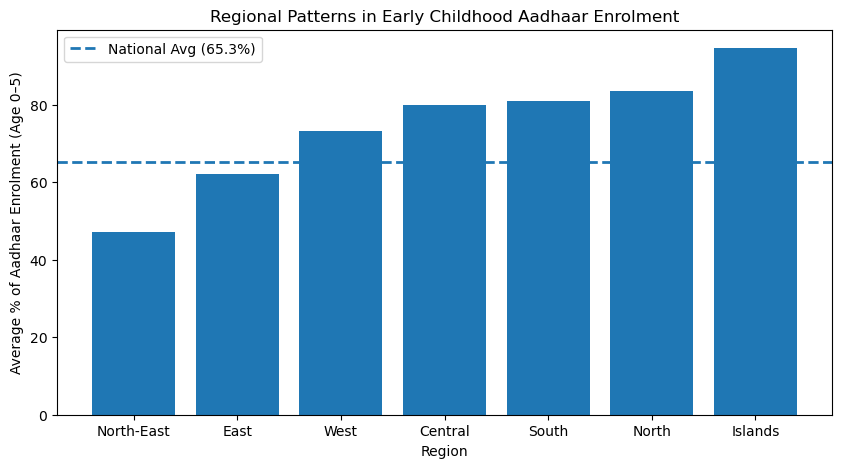

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(
    regional_summary["region"],
    regional_summary["pct_0_5"]
)

plt.axhline(
    y=national_age_percentage["age_0_5"],
    linestyle="--",
    linewidth=2,
    label=f"National Avg ({national_age_percentage['age_0_5']:.1f}%)"
)

plt.ylabel("Average % of Aadhaar Enrolment (Age 0–5)")
plt.xlabel("Region")
plt.title("Regional Patterns in Early Childhood Aadhaar Enrolment")
plt.legend()
plt.show()

In [69]:
national_avg_0_5 = national_age_percentage["age_0_5"]

In [71]:
state_priority = state_pct.copy()

In [73]:
state_priority["gap_from_national"] = (
    national_avg_0_5 - state_priority["pct_0_5"]
)

In [75]:
state_priority = state_priority[state_priority["gap_from_national"] > 0]

In [77]:
state_priority["intervention_priority_index"] = (
    state_priority["gap_from_national"] *
    state_priority["total_enrolment"]
)

In [79]:
priority_top_10 = (
    state_priority[
        ["state", "pct_0_5", "gap_from_national", "total_enrolment", "intervention_priority_index"]
    ]
    .sort_values(by="intervention_priority_index", ascending=False)
    .head(10)
)

priority_top_10

,state,pct_0_5,gap_from_national,total_enrolment,intervention_priority_index
6,Bihar,43.123600,22.129517,609585,1.348982e+07
30,Meghalaya,19.293803,45.959315,109771,5.045000e+06
5,Assam,61.353971,3.899147,230197,8.975718e+05
32,Nagaland,28.947200,36.305918,15587,5.659003e+05
22,Jharkhand,62.556573,2.696544,157539,4.248108e+05
29,Manipur,38.198573,27.054544,13456,3.640459e+05
40,Sikkim,47.757136,17.495981,2207,3.861363e+04
53,Westbengal,50.000000,15.253117,6,9.151870e+01


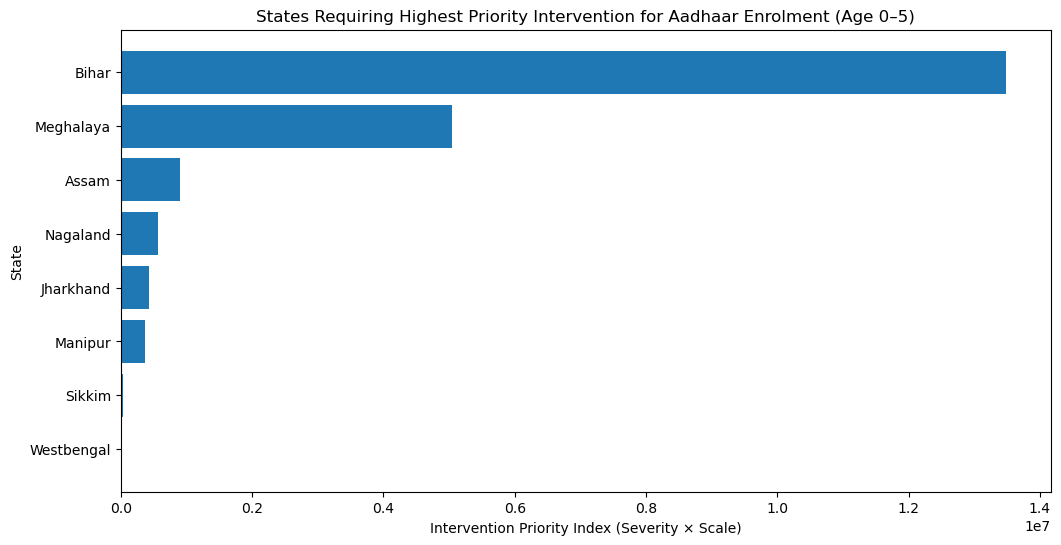

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.barh(
    priority_top_10["state"],
    priority_top_10["intervention_priority_index"]
)

plt.xlabel("Intervention Priority Index (Severity × Scale)")
plt.ylabel("State")
plt.title("States Requiring Highest Priority Intervention for Aadhaar Enrolment (Age 0–5)")
plt.gca().invert_yaxis()
plt.show()

In [83]:
quadrant_df = state_priority.copy()

quadrant_df = quadrant_df[
    ["state", "gap_from_national", "total_enrolment", "intervention_priority_index"]
].copy()

In [85]:
severity_threshold = quadrant_df["gap_from_national"].median()
scale_threshold = quadrant_df["total_enrolment"].median()

severity_threshold, scale_threshold

(19.812748827395577, 62679.0)

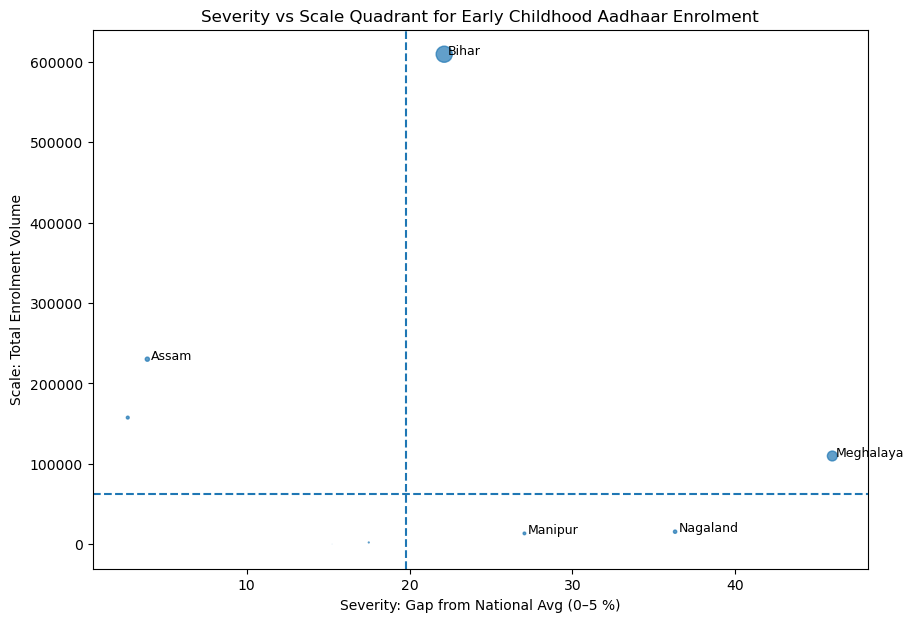

In [87]:
plt.figure(figsize=(10, 7))

plt.scatter(
    quadrant_df["gap_from_national"],
    quadrant_df["total_enrolment"],
    s=quadrant_df["intervention_priority_index"] / 1e5,  # bubble size
    alpha=0.7
)

# Reference lines (quadrants)
plt.axvline(severity_threshold, linestyle="--")
plt.axhline(scale_threshold, linestyle="--")

# Labels
plt.xlabel("Severity: Gap from National Avg (0–5 %)")
plt.ylabel("Scale: Total Enrolment Volume")
plt.title("Severity vs Scale Quadrant for Early Childhood Aadhaar Enrolment")

# Annotate key states only (clean & elite)
for state in ["Bihar", "Meghalaya", "Assam", "Nagaland", "Manipur"]:
    row = quadrant_df[quadrant_df["state"] == state]
    if not row.empty:
        plt.text(
            row["gap_from_national"].values[0] + 0.2,
            row["total_enrolment"].values[0],
            state,
            fontsize=9
        )

plt.show()

In [89]:
total_national_gap = state_priority["intervention_priority_index"].sum()
total_national_gap

20825855.52743692

In [91]:
state_priority["national_gap_contribution_pct"] = (
    state_priority["intervention_priority_index"] / total_national_gap
) * 100

In [93]:
top_gap_contributors = (
    state_priority[
        ["state", "national_gap_contribution_pct", "intervention_priority_index"]
    ]
    .sort_values(by="national_gap_contribution_pct", ascending=False)
    .head(10)
)

top_gap_contributors

,state,national_gap_contribution_pct,intervention_priority_index
6,Bihar,64.774393,1.348982e+07
30,Meghalaya,24.224695,5.045000e+06
5,Assam,4.309892,8.975718e+05
32,Nagaland,2.717297,5.659003e+05
22,Jharkhand,2.039824,4.248108e+05
29,Manipur,1.748048,3.640459e+05
40,Sikkim,0.185412,3.861363e+04
53,Westbengal,0.000439,9.151870e+01


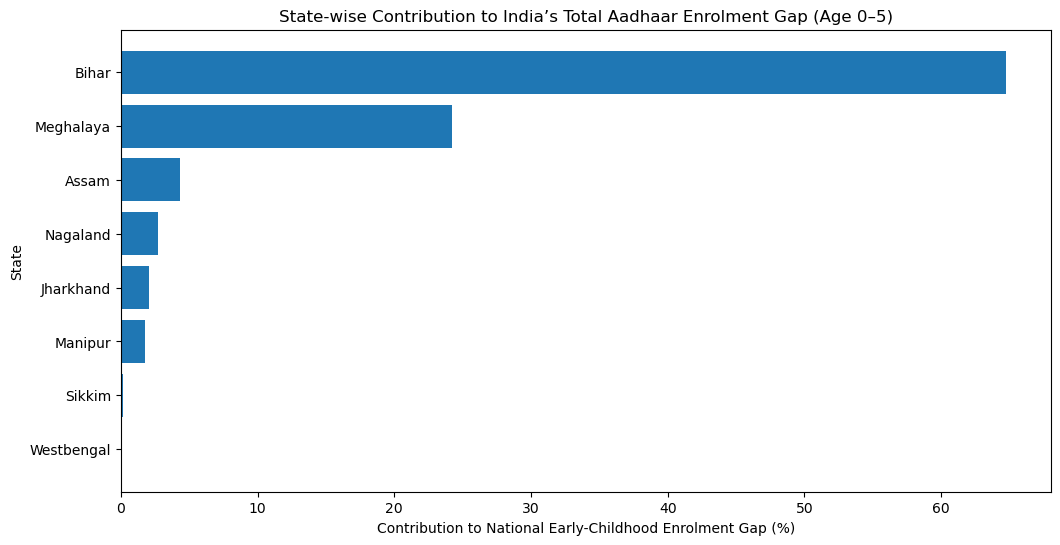

In [95]:
plt.figure(figsize=(12, 6))

plt.barh(
    top_gap_contributors["state"],
    top_gap_contributors["national_gap_contribution_pct"]
)

plt.xlabel("Contribution to National Early-Childhood Enrolment Gap (%)")
plt.ylabel("State")
plt.title("State-wise Contribution to India’s Total Aadhaar Enrolment Gap (Age 0–5)")
plt.gca().invert_yaxis()
plt.show()

In [97]:
current_national_avg = national_avg_0_5
current_national_avg

65.25311726065924

In [99]:
# Copy original state data
simulation_df = state_pct.copy()

# Apply +5% improvement only to Bihar
simulation_df.loc[
    simulation_df["state"] == "Bihar", "pct_0_5"
] = simulation_df.loc[
    simulation_df["state"] == "Bihar", "pct_0_5"
] + 5

In [101]:
# Weighted national average after simulation
simulated_national_avg = (
    (simulation_df["pct_0_5"] * simulation_df["total_enrolment"]).sum()
    / simulation_df["total_enrolment"].sum()
)

simulated_national_avg

65.81026514144513

In [103]:
impact_df = pd.DataFrame({
    "Scenario": ["Current", "After +5% Bihar Improvement"],
    "National Avg 0–5 Enrolment (%)": [
        current_national_avg,
        simulated_national_avg
    ]
})

impact_df

,Scenario,National Avg 0–5 Enrolment (%)
0,Current,65.253117
1,After +5% Bihar Improvement,65.810265


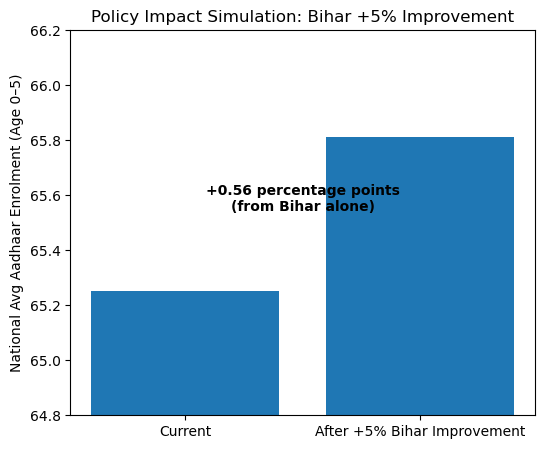

In [105]:
plt.figure(figsize=(6, 5))

plt.bar(
    impact_df["Scenario"],
    impact_df["National Avg 0–5 Enrolment (%)"]
)

# Zoom Y-axis around the change
plt.ylim(64.8, 66.2)

# Annotate delta
delta = simulated_national_avg - current_national_avg

plt.text(
    0.5,
    (current_national_avg + simulated_national_avg) / 2,
    f"+{delta:.2f} percentage points\n(from Bihar alone)",
    ha="center",
    va="bottom",
    fontsize=10,
    fontweight="bold"
)

plt.ylabel("National Avg Aadhaar Enrolment (Age 0–5)")
plt.title("Policy Impact Simulation: Bihar +5% Improvement")
plt.show()